# 뇌졸중 예측 

세계 보건기구 (WHO)에 따르면 뇌졸중은 전 세계적으로 두 번째 주요 사망 원인으로 전체 사망의 약 11 %를 차지합니다.
이 데이터 세트는 성별, 나이, 다양한 질병 및 흡연 상태와 같은 입력 매개 변수를 기반으로 환자가 뇌졸중에 걸릴 가능성을 예측하는 데 사용됩니다. 데이터의 각 행은 환자에 대한 관련 정보를 제공합니다.

#### 데이터 설명

|열 이름|뜻|데이터|
|---|---|---|
|ID|고유 식별자|int|
|gender|성별|Male, Female, Other|
|age|환자의 연령|연속형 데이터|
|hypertension|고혈압|고혈압이 있는 경우:0, 고혈압이 없는 경우:1|
|heart_disease|심장 질환의 유무|심장 질환이 없는 경우:0, 심장 질환이 있는 경우:1|
|ever_married|결혼 경험|Yes, No|
|work_type|직업 타입|Children, Govt_jov, Never_worked, Private, Self-employed|
|Residence_type|거주지 타입|Rural, Urban|
|avg_glucose_level|혈중 포도당 수치|연속형 데이터(float)|
|bmi|체질량 지수|연속형 데이터(float)|
|smoking_status|흡연 유무|formerly smoked, never smoked, smokes, Unknown|
|stroke|뇌졸중 유무|뇌졸중이 있는 경우: 1, 뇌졸중이 없는 경우: 0|

#### 2. 데이터 준비

In [23]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sns; sns.set()

file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 데이터 백업

In [24]:
data_copy = data.copy()
data_copy.to_csv('healthcare-dataset-stroke-data_copy.csv')

copy_file_path = 'healthcare-dataset-stroke-data_copy.csv'
data_copy = pd.read_csv(copy_file_path)
data_copy

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


데이터 백업 완료. 이후 사용할 때는 Unnamed column 제거 후 사용.

#### 데이터 정보 보기

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


bmi 값 총 개수가 4909로 N/A값이 들어있음을 확인.

#### 데이터 재구조화

In [27]:
data.groupby(['gender']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [28]:
# Male은 0으로, Female은 1로 변환
gender_dict = {'Male':0, 'Female':1, 'Other':100}
data['gender'] = data['gender'].map(gender_dict)

In [29]:
# ever_married  그룹 분석
data.groupby(['ever_married']).mean()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,,
No,36117.673307,0.622083,22.014229,0.030165,0.018213,96.44815,25.214721,0.016505
Yes,36727.514465,0.596779,54.342082,0.132717,0.072771,111.23031,30.850749,0.065613


In [30]:
# ever_married 재구조화
hp_dict = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].map(hp_dict)

In [31]:
# work_type 그룹 분석
data.groupby(['work_type']).mean()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
work_type,,,,,,,,,
Govt_job,36516.936073,0.607306,50.879756,0.111111,0.054795,0.821918,107.779772,30.522063,0.050228
Never_worked,38274.409091,0.500000,16.181818,0.000000,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,0.633846,45.503932,0.096068,0.054017,0.719316,106.796844,30.304625,0.050940
Self-employed,35551.288156,0.615385,60.201465,0.175824,0.098901,0.865690,112.645446,30.211871,0.079365
children,35769.432314,0.474527,6.841339,0.000000,0.001456,0.000000,94.400277,20.038003,0.002911


In [32]:
# work_type 재구조화
work_dict = {'Govt_job': 0, 'Never_worked':1, 'Private':2, 'Self-employed':3, 'children':4}
data['work_type'] = data['work_type'].map(work_dict)

In [33]:
# Residence_type 그룹 분석
data.groupby(['Residence_type']).mean()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,,,,
Rural,36547.998011,0.622514,42.900811,0.099841,0.053302,0.653142,2.175815,106.375235,28.894212,0.045346
Urban,36488.613636,0.588983,43.542126,0.095146,0.054700,0.659091,2.159861,105.927307,28.892289,0.052003


In [34]:
# Residence_type 재구조화
resi_dict = {'Rural':0, 'Urban':1}
data['Residence_type'] = data['Residence_type'].map(resi_dict)

In [35]:
# smoking_status 그룹 분석
data.groupby(['smoking_status']).mean()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
Unknown,35899.042098,0.541451,30.229922,0.033679,0.031088,0.416451,2.738342,0.506477,99.601541,25.666352,0.030440
formerly smoked,36878.981921,0.651977,54.929944,0.135593,0.087006,0.833898,1.963842,0.516384,112.886079,30.747192,0.079096
never smoked,36833.141649,0.649577,46.744715,0.122622,0.047569,0.719873,1.926533,0.492072,107.558092,29.982559,0.047569
smokes,36567.533587,0.572877,47.096324,0.119138,0.077313,0.773131,1.858048,0.539924,108.017440,30.543555,0.053232


In [36]:
# smoking_status 재구조화
smoking_dict = {'Unknown':0, 'formerly smoked':1, 'never smoked':2, 'smokes':3}
data['smoking_status'] = data['smoking_status'].map(smoking_dict)

데이터 변경이 잘 되었는지 확인해본다

In [37]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,1,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,1,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,1,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,0,51.0,0,0,1,2,0,166.29,25.6,1,0


age 값이 실수형으로 나온 이유는 데이터 중 일부가 실수형으로 올바르지 않게 되어있기 때문이다.

그러므로 이를 처리하기 위한 과정이 필요하다

또한 bmi 값 중의 NaN 값을 처리하는 과정도 필요하다

#### 데이터 결측값 처리

In [39]:
! pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)


In [40]:
import missingno as msno

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

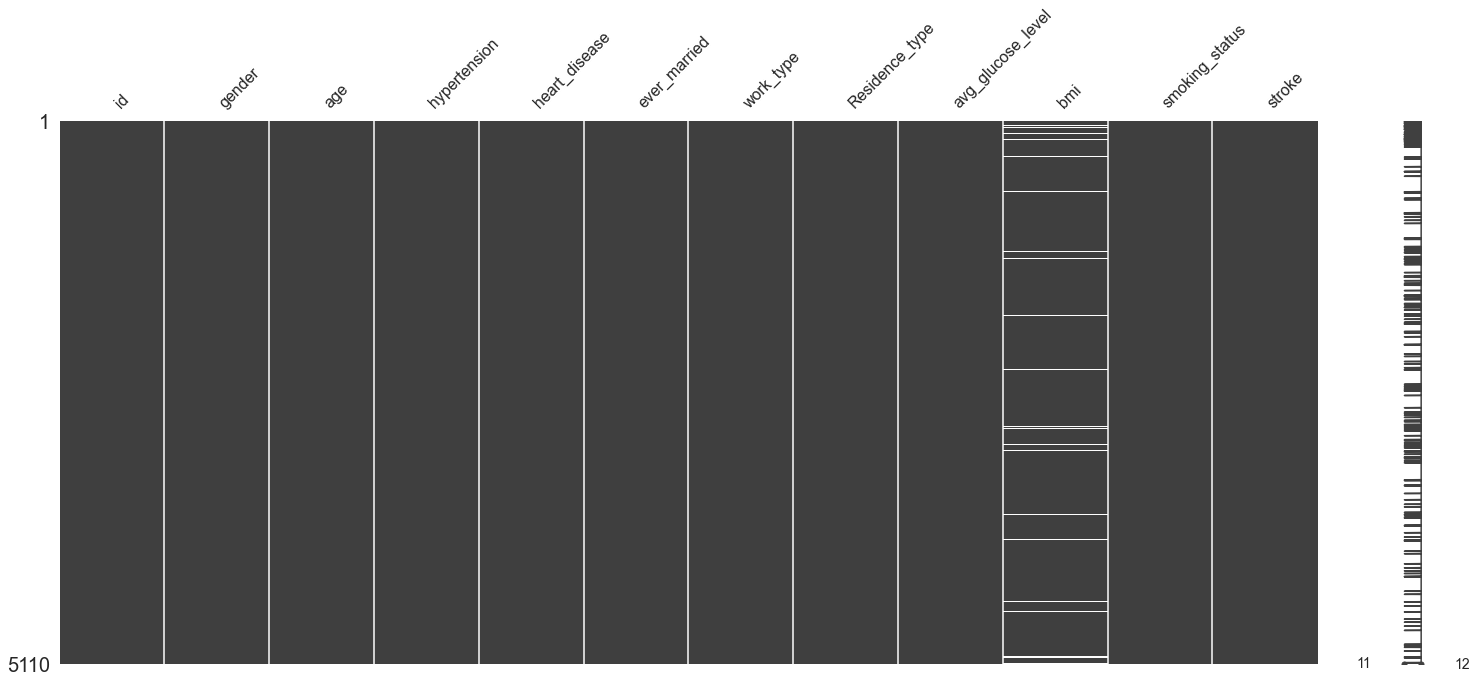

In [41]:
msno.matrix(data)

총 5110개의 데이터 중에서 201개의 결측값이 존재한다.

비율로 보면 약 3% 정도이다.

10% 미만으로 삭제 또는 대치를 할 수 있을 것이다. 

그 중 값들을 선형적으로 같은 간격으로 처리하는 interpolate()를 이용해 결측값 처리를 진행하고자 한다.

In [42]:
# 결측값이 있는 데이터 채우기
data1 = data.interpolate(method='linear', limit_direction='forward')

<AxesSubplot:>

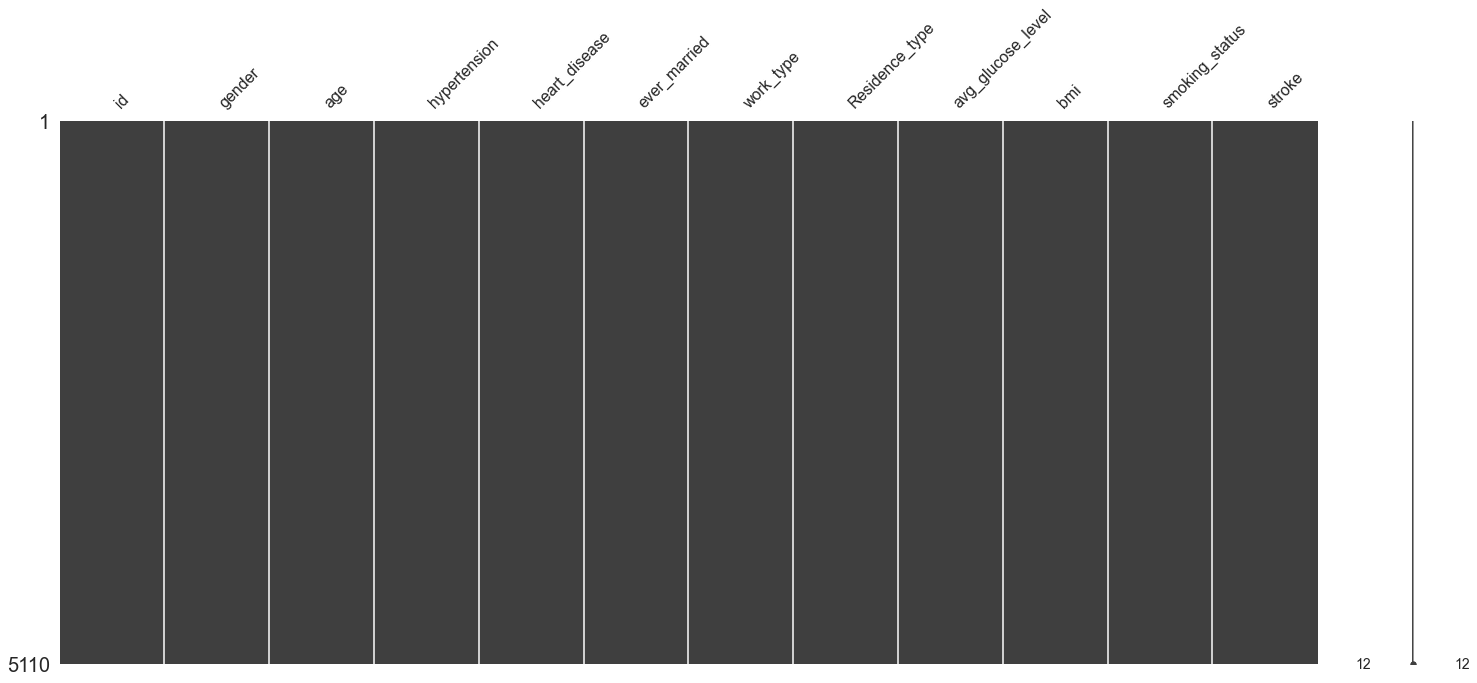

In [43]:
msno.matrix(data1)

결측치 처리 완료.

나이는 정수형 데이터. 그러므로 실수형으로 표현된 값을 정수형으로 변환하는 과정을 거친다

In [44]:
# 실수형으로 되어 있던 age를 int 값으로 변환
data1['age'] = data1['age'].astype(np.int64)

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


In [46]:
# id Column 삭제
data1 = data1.drop('id', axis =1)

In [47]:
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,2,1,228.69,36.60,1,1
1,1,61,0,0,1,3,0,202.21,34.55,2,1
2,0,80,0,1,1,2,0,105.92,32.50,2,1
3,1,49,0,0,1,2,1,171.23,34.40,3,1
4,1,79,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,1,2,1,83.75,29.30,2,0
5106,1,81,0,0,1,3,1,125.20,40.00,2,0
5107,1,35,0,0,1,3,0,82.99,30.60,2,0
5108,0,51,0,0,1,2,0,166.29,25.60,1,0


#### 데이터 이상치 처리

<AxesSubplot:xlabel='bmi'>

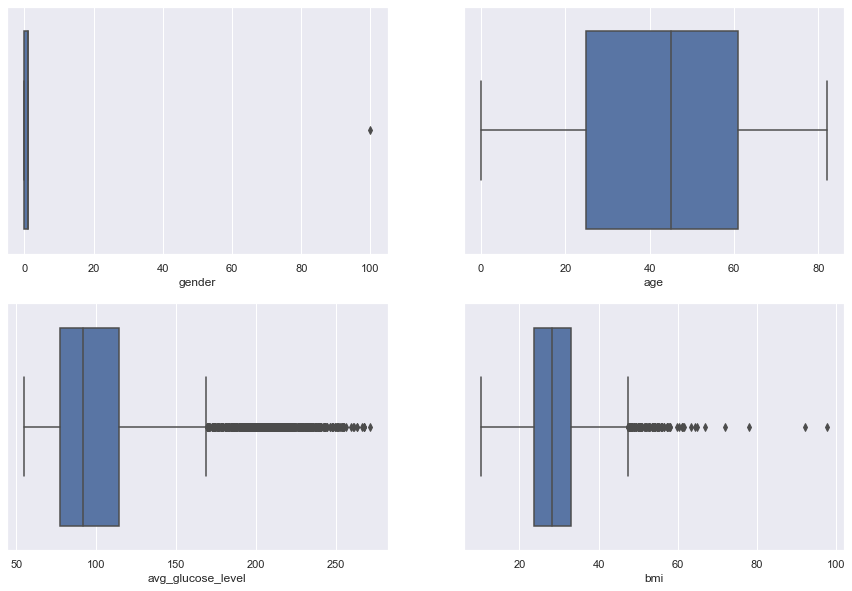

In [48]:
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2) # 표를 넣을 4칸 생성
figure.set_size_inches(15,10) # 표 하나의 사이즈 정하기

sns.boxplot(x = "gender", data = data1, ax=ax1)
sns.boxplot(x = "age", data = data1, ax=ax2)
sns.boxplot(x = "avg_glucose_level", data = data1, ax=ax3)
sns.boxplot(x = "bmi", data = data1, ax=ax4)

gender 값에 존재하는 이상치를 삭제한다
-> gender 'Other' 데이터 삭제를 위하여

bmi 값이 70 이상인 데이터를 삭제한다.
-> bmi가 높을 때, 뇌졸중이 있을 가능성이 높지 않을까 하는 추측으로 일부 이상치만 제거하였음


In [49]:
data2 = data1[(data1['gender']<3) & (data1['bmi']<70)]

data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,2,1,228.69,36.60,1,1
1,1,61,0,0,1,3,0,202.21,34.55,2,1
2,0,80,0,1,1,2,0,105.92,32.50,2,1
3,1,49,0,0,1,2,1,171.23,34.40,3,1
4,1,79,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,1,2,1,83.75,29.30,2,0
5106,1,81,0,0,1,3,1,125.20,40.00,2,0
5107,1,35,0,0,1,3,0,82.99,30.60,2,0
5108,0,51,0,0,1,2,0,166.29,25.60,1,0


<AxesSubplot:xlabel='bmi'>

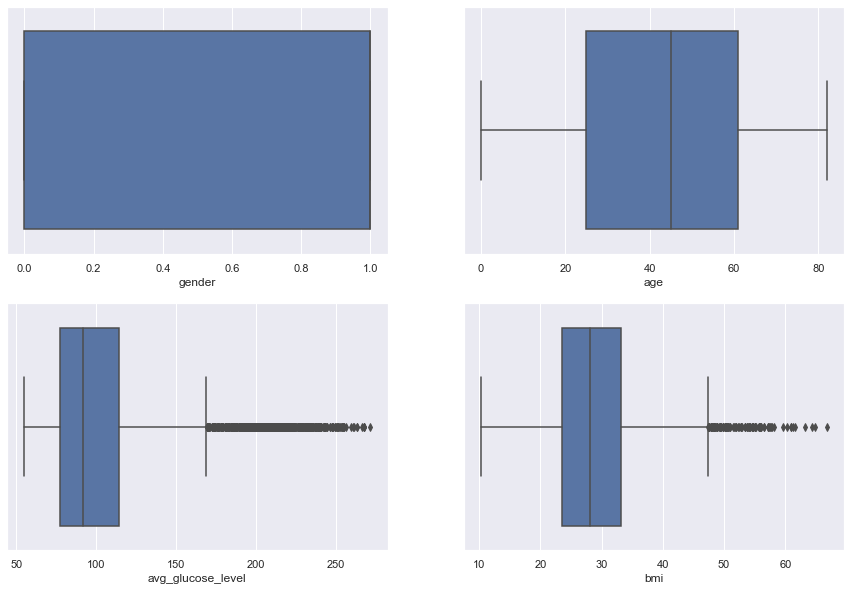

In [50]:
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2) # 표를 넣을 4칸 생성
figure.set_size_inches(15,10) # 표 하나의 사이즈 정하기

sns.boxplot(x = "gender", data = data2, ax=ax1)
sns.boxplot(x = "age", data = data2, ax=ax2)
sns.boxplot(x = "avg_glucose_level", data = data2, ax=ax3)
sns.boxplot(x = "bmi", data = data2, ax=ax4)

#### 데이터 시각화

c:\users\윤혜주\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\윤혜주\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\윤혜주\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

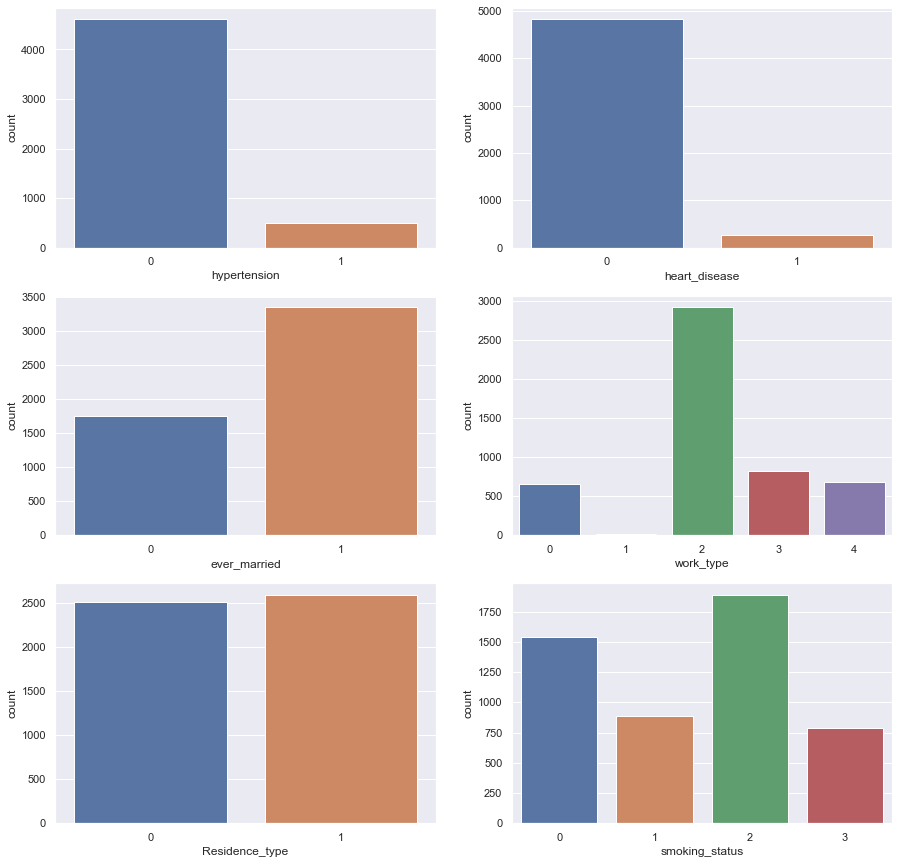

In [51]:
figure, ((ax1, ax2),(ax3,ax4),(ax5, ax6)) = plt.subplots(nrows=3,ncols=2) # 표를 넣을 8칸 생성
figure.set_size_inches(15,15) # 표 하나의 사이즈 정하기

sns.countplot("hypertension", data = data2, ax=ax1)
sns.countplot("heart_disease", data = data2, ax=ax2)
sns.countplot("ever_married", data = data2, ax=ax3)
sns.countplot("work_type", data = data2, ax=ax4)
sns.countplot("Residence_type", data = data2, ax=ax5)
sns.countplot("smoking_status", data = data2, ax=ax6)


1. hypertension: 고혈압이 있는 사람의 수가 훨씬 많다

2. heart_disease: 심장 질환을 가지고 있지 않은 경우가 훨씬 많다.

3. ever_married: 결혼 경험이 있는 경우가 그렇지 않은 경우의 2배 가량이다.

4. work_type: 'Private'인 사람이 가장 많고, 'Never_worked'인 사람이 가장 적다.

5. Residence_type: 거주 타입의 차는 거의 없다.

6. smoking_status: 'never smoked'인 사람이 가장 많고, 'smokes'인 사람이 가장 적다.

In [52]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data2[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

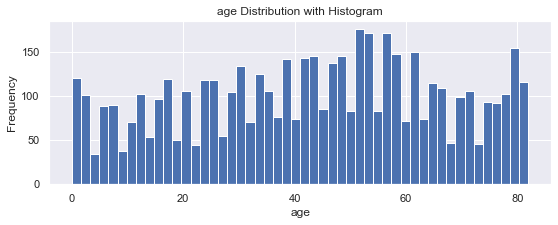

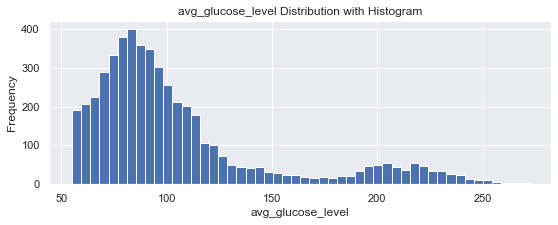

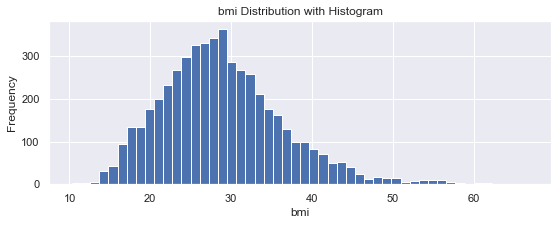

In [53]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

In [54]:
def bar_chart(feature):
    yes = data2[data2['stroke']==1][feature].value_counts()
    no = data2[data2['stroke']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes Stroke','No Stroke']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

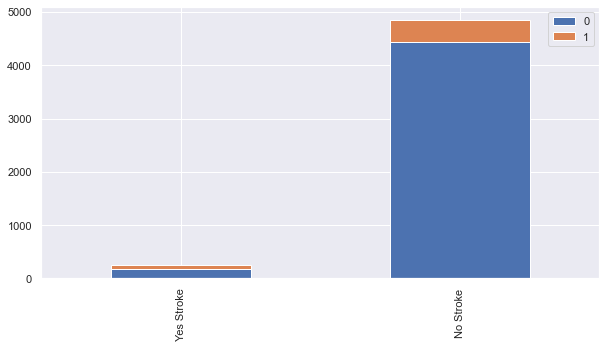

In [55]:
bar_chart('hypertension')

뇌졸중이 있는 환자 중 대부분은 고혈압이 있다

그러나 뇌졸중이 없는 환자 중의 대부분도 고혈압을 가지고 있다

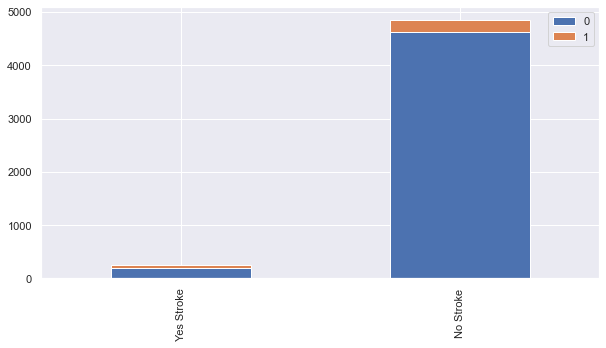

In [56]:
bar_chart('heart_disease')

뇌졸중이 있는 환자 중 심장 질환을 가진 사람은 매우 적다.

그러나 뇌졸중이 없는 환자의 대부분은 심장 실환을 가지고 있지 않다.

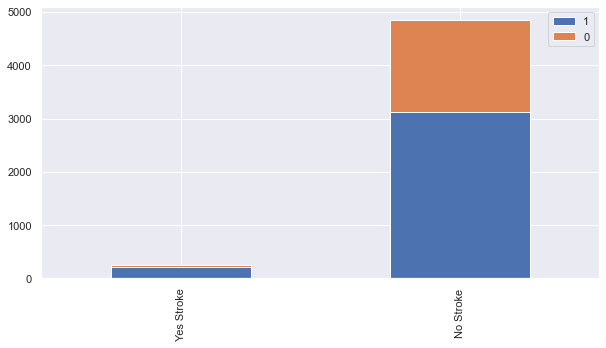

In [57]:
bar_chart('ever_married')

뇌졸중에 걸린 환자 대부분은 결혼 경험이 있다.

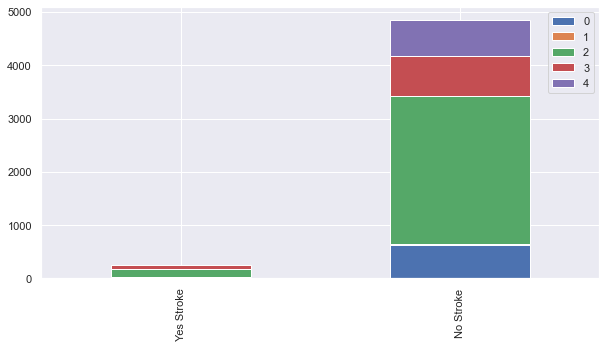

In [58]:
bar_chart('work_type')

'Private' work_type을 가진 환자들이 뇌졸중이 있는 확률이 비교적 높다

'children'의 경우 뇌졸중이 있을 확률이 거의 없다.

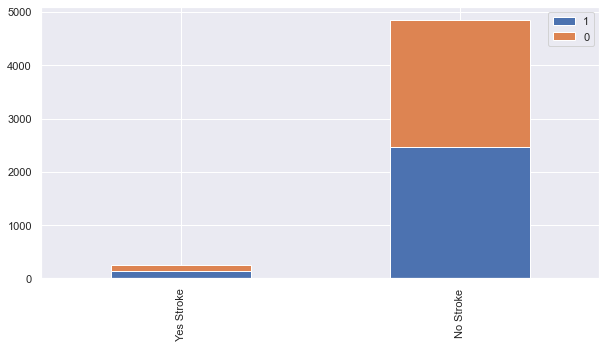

In [59]:
bar_chart('Residence_type')

거주 지역과 뇌졸중의 유무는 상관관계가 적어 보인다.

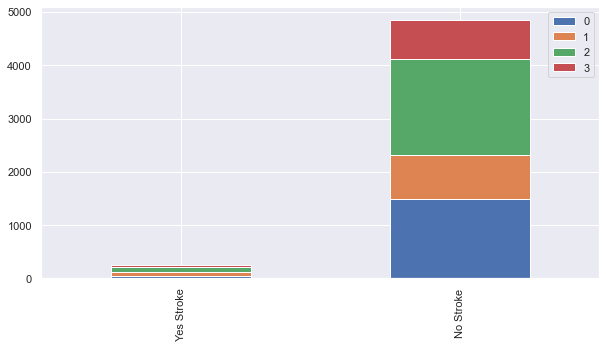

In [60]:
bar_chart('smoking_status')

뇌졸중 환자 중 담배를 피지 않은 사람의 비율이 비교적 높다.

위의 object형 데이터들과 뇌졸중 유무의 관계가 뚜렷하게 보이지 않은 것 같다.

#### 상관관계

In [61]:
#상관관계 파악(상관계수)
corrMatt = data2[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
corrMatt = corrMatt.corr()
corrMatt

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027685,-0.020448,-0.085856,0.030443,-0.056686,0.005237,-0.054606,0.029247,0.062204,-0.009206
age,0.027685,1.000000,0.278451,0.263602,0.679095,-0.362342,0.013913,0.238064,0.332494,0.265744,0.245064
hypertension,-0.020448,0.278451,1.000000,0.109005,0.165981,-0.051648,-0.007443,0.177020,0.139776,0.110925,0.128636
heart_disease,-0.085856,0.263602,0.109005,1.000000,0.114597,-0.028060,0.002949,0.162013,0.046906,0.048533,0.134868
ever_married,0.030443,0.679095,0.165981,0.114597,1.000000,-0.353042,0.006272,0.154872,0.339717,0.259743,0.108295
work_type,-0.056686,-0.362342,-0.051648,-0.028060,-0.353042,1.000000,-0.007413,-0.050549,-0.300443,-0.306041,-0.032351
Residence_type,0.005237,0.013913,-0.007443,0.002949,0.006272,-0.007413,1.000000,-0.004588,0.006512,0.007859,0.015329
avg_glucose_level,-0.054606,0.238064,0.177020,0.162013,0.154872,-0.050549,-0.004588,1.000000,0.174449,0.063428,0.132074
bmi,0.029247,0.332494,0.139776,0.046906,0.339717,-0.300443,0.006512,0.174449,1.000000,0.218210,0.049647
smoking_status,0.062204,0.265744,0.110925,0.048533,0.259743,-0.306041,0.007859,0.063428,0.218210,1.000000,0.028183


<AxesSubplot:>

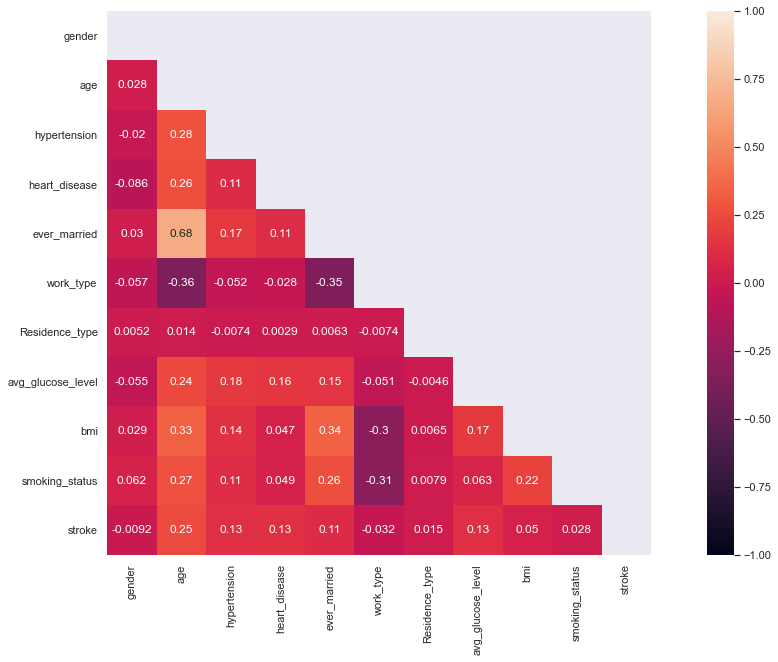

In [62]:
mask = np.zeros_like(corrMatt, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

figure, ax = plt.subplots()
figure.set_size_inches(20,10)

#vmin값과 vmax값은 -1, 1값으로 지정하여야 보기 좋습니다.
sns.heatmap(corrMatt, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

1. 나이와 결혼 유무 데이터의 상관관계가 매우 크다

2. 나이와 bmi는 뚜렷한 양적 상관관계를 가지고 있다.

3. 나이는 work_type과 뚜렷한 음적 상관관계를 가지고 있다.

4. 결혼 유무와 work_type은 뚜렷한 음적 상관관계를 가지고 있다.

5. 결혼 유무와 bmi는 뚜렷한 양적 상관관계를 가지고 있다.

6. work_type은 bmi와 뚜렷한 음적 상관관계를 가지고 있다. 

7. work_type은 흡연 상태와 뚜렷한 음적 상관관계를 가지고 있다.

8. 뇌졸중 유무는 나이와 약한 양적 상관관계를 가지고 있다.

9. 뇌졸중 유무는 고혈압 유무와 약한 양적 상관관계를 가지고 있다.

10. 뇌졸중 유무는 결혼 유무와 약한 양적 상관관계를 가지고 있다. 

11. 뇌졸중 유무는 혈중 포도당 농도와 약한 양적 상관관계를 가지고 있다.

#### 머신러닝

In [66]:
! pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=9139c414dc7b359807fd5e73ee163b6fb8beb2d9f8d96377a3e6dac3709931eb
  Stored in directory: c:\users\윤혜주\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [67]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [68]:
# 데이터 세트 분류
x_data=data2[['age', 'hypertension']]
y_data=data2['stroke']

x_data=x_data.values
y_data=y_data.values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=42)

< Multiple Linear Regression>

In [69]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [70]:
# train 학습
y_predict = mlr.predict(x_train)
score=mlr.score(x_train,y_train)
print('train score: ',score)

train score:  0.0609105033470152


In [71]:
# test 평가
y_predict = mlr.predict(x_test)
score=mlr.score(x_test,y_test)
print('test score: ',score)

test score:  0.06616114306878929


< Logistic Regression >

In [72]:
# 로지스틱 모델링
estimator=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,verbose=0,warm_start=False,n_jobs=1)
estimator.fit(x_train,y_train)

LogisticRegression(n_jobs=1)

In [73]:
# train 학습
y_predict = estimator.predict(x_train)
score=metrics.accuracy_score(y_train,y_predict)
print('train score: ',score)

train score:  0.9552197033305345


In [74]:
# test 평가
y_predict = estimator.predict(x_test)
score=metrics.accuracy_score(y_test,y_predict)
print('test score: ',score)

test score:  0.9419060052219321


< Decision Tree >

In [75]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
# train 학습
y_predict = dt.predict(x_train)
score=metrics.accuracy_score(y_train,y_predict)
print('train score: ',score)

train score:  0.9552197033305345


In [77]:
# test 평가
y_predict = dt.predict(x_test)
score=metrics.accuracy_score(y_test,y_predict)
print('test score: ',score)

test score:  0.9419060052219321
